# LIBRARIES

In [688]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
# set randomseed
rng = np.random.default_rng(seed=42)

Regression models

In [619]:
from lightgbm import LGBMRegressor

# **Data collection and processing**

In [620]:
# loading the data from csv file to a Pandas DataFrame
dataframe_prog= pd.read_csv('E:\IOMT\Task 3\stats_program.csv')

In [621]:
dataframe_prog.head()

,S.no,process_cpu_percent,process_rss_percent,proces_vms_percent,process_data_percent,data_time
0,1,0.0,13.307912,26.576486,14.105149,1665678397
1,2,0.0,13.307912,26.576486,14.105149,1665678399
2,3,0.0,13.207294,26.576486,14.105149,1665678401
3,4,0.0,13.202747,26.576486,14.105149,1665678403
4,5,61.9,9.193432,22.451134,9.979797,1665678405


In [622]:
dataframe_ster=pd.read_csv('E:\IOMT\Task 3\stats_serialized.csv')

In [623]:
dataframe_ster.head()

,s.no,cpu_times_user,cpu_times_nice,cpu_times_system,cpu_times_idle,cpu_times_iowait,cpu_times_irq,cpu_times_softirq,cpu_times_steal,cpu_times_guest,...,swap_sout,disk_read_count,disk_write_count,disk_read_bytes,disk_write_bytes,disk_read_time,disk_write_time,disk_read_merged_count,disk_write_merged_count,disk_busy_count
0,1,316.83,10.83,28.97,7749.76,193.11,0,0.54,0,0,...,495980544,59506,15120,2158542336,1280365568,477475,455251,19464,121598,265428
1,2,317.00,10.83,28.98,7751.53,193.14,0,0.54,0,0,...,495980544,59512,15120,2158571008,1280365568,477507,455251,19465,121598,265472
2,3,317.10,10.83,29.00,7753.41,193.14,0,0.54,0,0,...,495980544,59513,15161,2158575104,1280640000,477508,455258,19465,121599,265480
3,4,317.47,10.83,29.01,7755.01,193.14,0,0.54,0,0,...,495980544,59513,15163,2158575104,1280668672,477508,455307,19465,121604,265532
4,5,317.49,10.83,29.02,7756.94,193.19,0,0.54,0,0,...,495980544,59513,15163,2158575104,1280668672,477508,455307,19465,121604,265532


Combining the Two data sets

In [624]:
dataframe_prog = dataframe_prog[dataframe_prog['process_cpu_percent'] != 0]


In [625]:
dataframe_prog

,S.no,process_cpu_percent,process_rss_percent,proces_vms_percent,process_data_percent,data_time
4,5,61.9,9.193432,22.451134,9.979797,1665678405
10,11,81.9,8.083270,21.356984,8.885647,1665678417
15,16,15.0,9.352563,23.217533,10.746197,1665678427
16,17,36.9,11.749020,25.015024,12.543687,1665678429
21,22,61.9,14.420051,27.700881,15.229544,1665678439
...,...,...,...,...,...,...
711,712,98.9,9.828771,23.288698,10.817361,1665679842
717,718,82.0,16.246402,32.496758,20.025421,1665679854
718,719,99.9,16.767087,32.496758,20.025421,1665679856
719,720,97.9,17.532498,32.496758,20.025421,1665679858


In [626]:
# replacing the 0 values with mean
#dataframe_prog['process_cpu_percent']=dataframe_prog['process_cpu_percent'].replace(0,dataframe_prog['process_cpu_percent'].mean())

dataframe=pd.concat([dataframe_prog,dataframe_ster['cpu_times_user']],axis=1)



In [627]:

dataframe=dataframe.drop(columns=['data_time'],axis=1)

In [628]:
dataframe

,S.no,process_cpu_percent,process_rss_percent,proces_vms_percent,process_data_percent,cpu_times_user
4,5.0,61.9,9.193432,22.451134,9.979797,317.49
10,11.0,81.9,8.083270,21.356984,8.885647,319.07
15,16.0,15.0,9.352563,23.217533,10.746197,319.91
16,17.0,36.9,11.749020,25.015024,12.543687,319.92
21,22.0,61.9,14.420051,27.700881,15.229544,320.94
...,...,...,...,...,...,...
5223,NaN,NaN,NaN,NaN,NaN,7802.88
5224,NaN,NaN,NaN,NaN,NaN,7804.87
5225,NaN,NaN,NaN,NaN,NaN,7806.85
5226,NaN,NaN,NaN,NaN,NaN,7808.82


In [629]:
dataframe = dataframe.dropna()

In [630]:
dataframe=dataframe.drop(columns=['S.no'],axis=1)

In [631]:
dataframe

,process_cpu_percent,process_rss_percent,proces_vms_percent,process_data_percent,cpu_times_user
4,61.9,9.193432,22.451134,9.979797,317.49
10,81.9,8.083270,21.356984,8.885647,319.07
15,15.0,9.352563,23.217533,10.746197,319.91
16,36.9,11.749020,25.015024,12.543687,319.92
21,61.9,14.420051,27.700881,15.229544,320.94
...,...,...,...,...,...
711,98.9,9.828771,23.288698,10.817361,927.12
717,82.0,16.246402,32.496758,20.025421,932.48
718,99.9,16.767087,32.496758,20.025421,934.40
719,97.9,17.532498,32.496758,20.025421,936.37


In [632]:
dataframe=pd.read_csv('E:\IOMT\Task 3\modified.csv')

# **`Data analysis`**

In [633]:
print(type(dataframe.shape),dataframe.shape)


<class 'tuple'> (375, 6)


In [634]:
dataframe.info

<bound method DataFrame.info of      S.no  process_cpu_percent  process_rss_percent  proces_vms_percent  \
0       1                 61.9             9.193432           22.451134   
1       2                 81.9             8.083270           21.356984   
2       3                 15.0             9.352563           23.217533   
3       4                 36.9            11.749020           25.015024   
4       5                 61.9            14.420051           27.700881   
..    ...                  ...                  ...                 ...   
370   371                 98.9             9.828771           23.288698   
371   372                 82.0            16.246402           32.496758   
372   373                 99.9            16.767087           32.496758   
373   374                 97.9            17.532498           32.496758   
374   375                 97.9            18.469297           32.496758   

     process_data_percent  cpu_times_user  
0                9.9797

In [635]:
dataframe.describe()

,S.no,process_cpu_percent,process_rss_percent,proces_vms_percent,process_data_percent,cpu_times_user
count,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000
mean,188.000000,82.189067,12.109896,25.940134,13.468797,613.606267
std,108.397417,28.045573,2.577976,2.680014,2.680014,185.744351
min,1.000000,1.000000,7.287417,21.005116,8.533779,317.490000
25%,94.500000,78.400000,9.669837,23.288698,10.817361,447.635000
50%,188.000000,97.900000,12.683446,26.602975,14.131638,610.630000
75%,281.500000,98.900000,13.939297,27.756033,15.284697,778.015000
max,375.000000,100.900000,21.860075,34.357703,21.886367,938.370000


In [636]:
# copy the data
df_max_scaled = dataframe.copy()
column = ['process_cpu_percent','process_rss_percent','proces_vms_percent','process_data_percent','cpu_times_user']
# apply normalization techniques
for column in df_max_scaled.columns:
	df_max_scaled[column] = df_max_scaled[column] / df_max_scaled[column].abs().max()
	
# view normalized data
display(df_max_scaled)


,S.no,process_cpu_percent,process_rss_percent,proces_vms_percent,process_data_percent,cpu_times_user
0,0.002667,0.613479,0.420558,0.653453,0.455982,0.338342
1,0.005333,0.811695,0.369773,0.621607,0.405990,0.340026
2,0.008000,0.148662,0.427838,0.675759,0.491000,0.340921
3,0.010667,0.365709,0.537465,0.728076,0.573128,0.340932
4,0.013333,0.613479,0.659652,0.806249,0.695846,0.342019
...,...,...,...,...,...,...
370,0.989333,0.980178,0.449622,0.677830,0.494251,0.988011
371,0.992000,0.812686,0.743200,0.945836,0.914972,0.993723
372,0.994667,0.990089,0.767019,0.945836,0.914972,0.995769
373,0.997333,0.970268,0.802033,0.945836,0.914972,0.997869


In [637]:
#STANDARD SCALLER
col_names = ['process_cpu_percent','process_rss_percent','proces_vms_percent','process_data_percent','cpu_times_user']
features = dataframe[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
dataframe_scaled = pd.DataFrame(features, columns = col_names)

In [638]:
dataframe_scaled

,process_cpu_percent,process_rss_percent,proces_vms_percent,process_data_percent,cpu_times_user
0,-0.724399,-1.132811,-1.303598,-1.303598,-1.596344
1,-0.010321,-1.564020,-1.712407,-1.712407,-1.587826
2,-2.398911,-1.071002,-1.017248,-1.017248,-1.583298
3,-1.616996,-0.140171,-0.345650,-0.345650,-1.583244
4,-0.724399,0.897309,0.657869,0.657869,-1.577745
...,...,...,...,...,...
370,0.596645,-0.886033,-0.990659,-0.990659,1.690133
371,-0.006750,1.606700,2.449757,2.449757,1.719028
372,0.632349,1.808944,2.449757,2.449757,1.729379
373,0.560941,2.106245,2.449757,2.449757,1.739999


In [639]:
df_max_scaled['S.no'].values

array([0.00266667, 0.00533333, 0.008     , 0.01066667, 0.01333333,
       0.016     , 0.01866667, 0.02133333, 0.024     , 0.02666667,
       0.02933333, 0.032     , 0.03466667, 0.03733333, 0.04      ,
       0.04266667, 0.04533333, 0.048     , 0.05066667, 0.05333333,
       0.056     , 0.05866667, 0.06133333, 0.064     , 0.06666667,
       0.06933333, 0.072     , 0.07466667, 0.07733333, 0.08      ,
       0.08266667, 0.08533333, 0.088     , 0.09066667, 0.09333333,
       0.096     , 0.09866667, 0.10133333, 0.104     , 0.10666667,
       0.10933333, 0.112     , 0.11466667, 0.11733333, 0.12      ,
       0.12266667, 0.12533333, 0.128     , 0.13066667, 0.13333333,
       0.136     , 0.13866667, 0.14133333, 0.144     , 0.14666667,
       0.14933333, 0.152     , 0.15466667, 0.15733333, 0.16      ,
       0.16266667, 0.16533333, 0.168     , 0.17066667, 0.17333333,
       0.176     , 0.17866667, 0.18133333, 0.184     , 0.18666667,
       0.18933333, 0.192     , 0.19466667, 0.19733333, 0.2    

In [640]:
dataframe.columns

Index(['S.no', 'process_cpu_percent', 'process_rss_percent',
       'proces_vms_percent', 'process_data_percent', 'cpu_times_user'],
      dtype='object')

##DATA VISUALIZATION

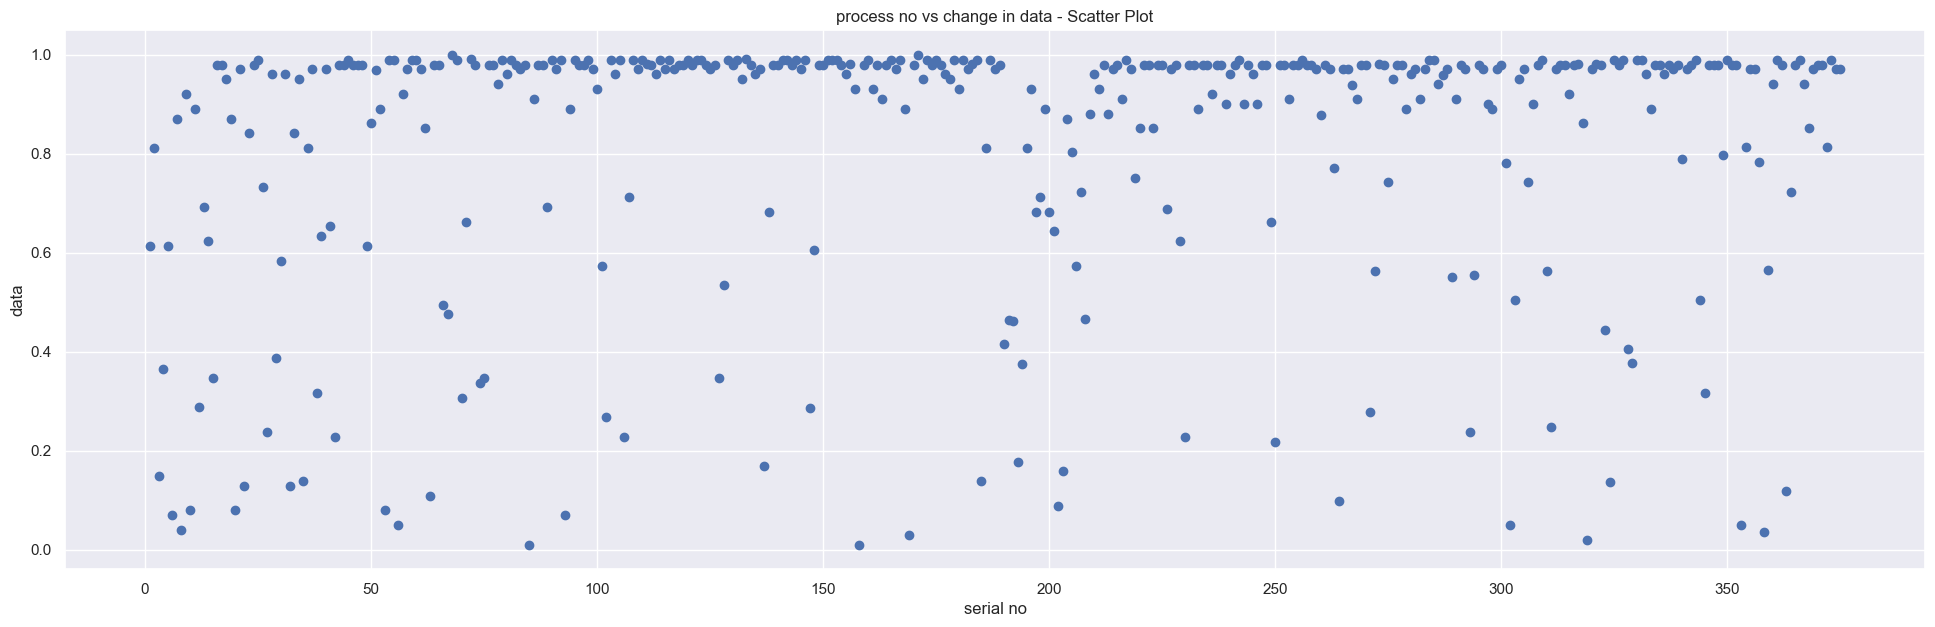

In [641]:
plt.figure(figsize = (24, 7))
plt.scatter(dataframe['S.no'], df_max_scaled['process_cpu_percent'])
plt.xlabel('serial no')
plt.ylabel('data')
plt.title('process no vs change in data - Scatter Plot')
plt.show()

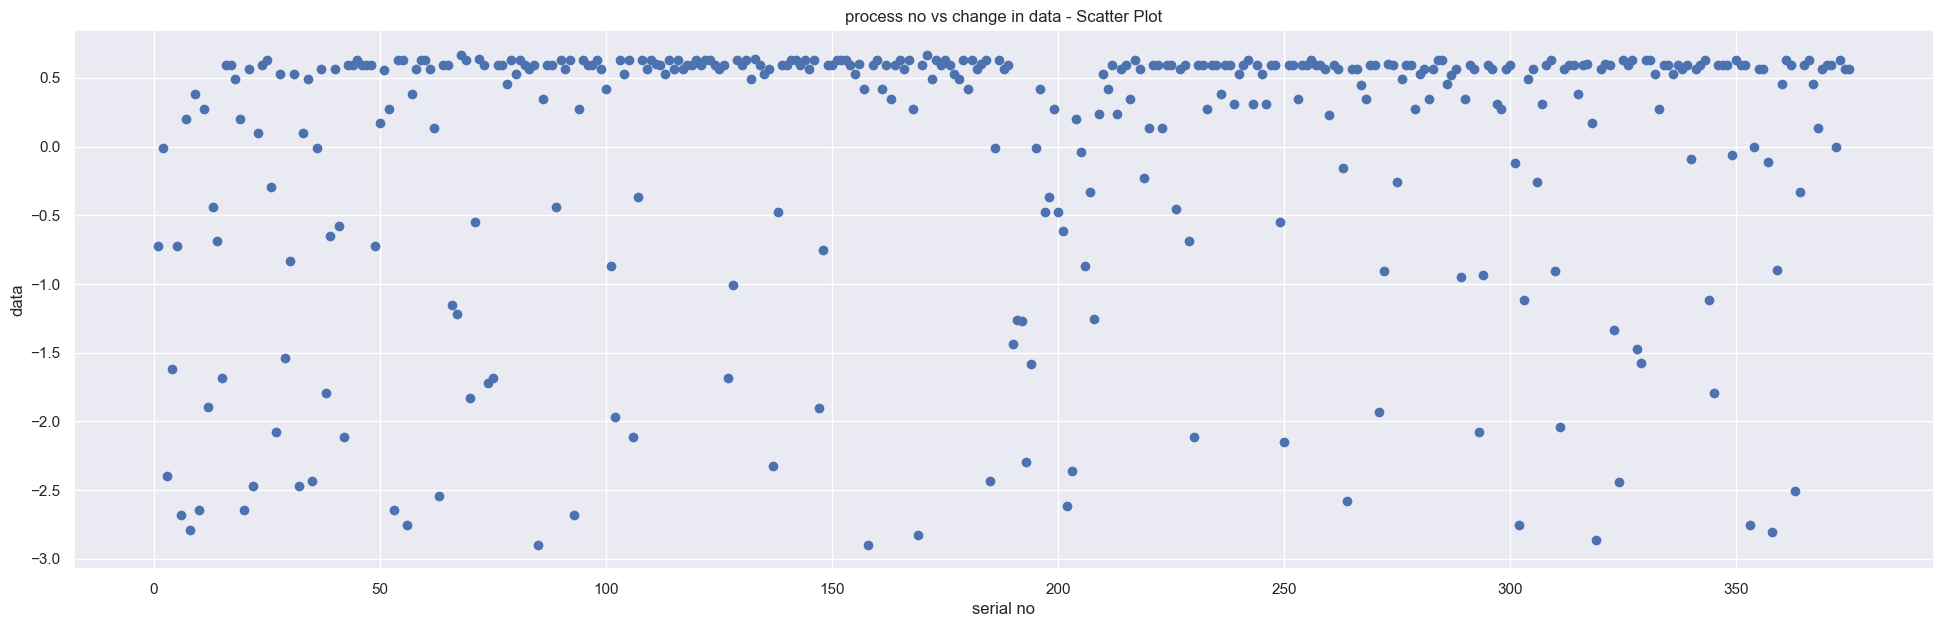

In [642]:
plt.figure(figsize = (24, 7))
plt.scatter(dataframe['S.no'], dataframe_scaled['process_cpu_percent'])
plt.xlabel('serial no')
plt.ylabel('data')
plt.title('process no vs change in data - Scatter Plot')
plt.show()

Text(0.5, 1.0, 'process no vs change in data - Box Plot')

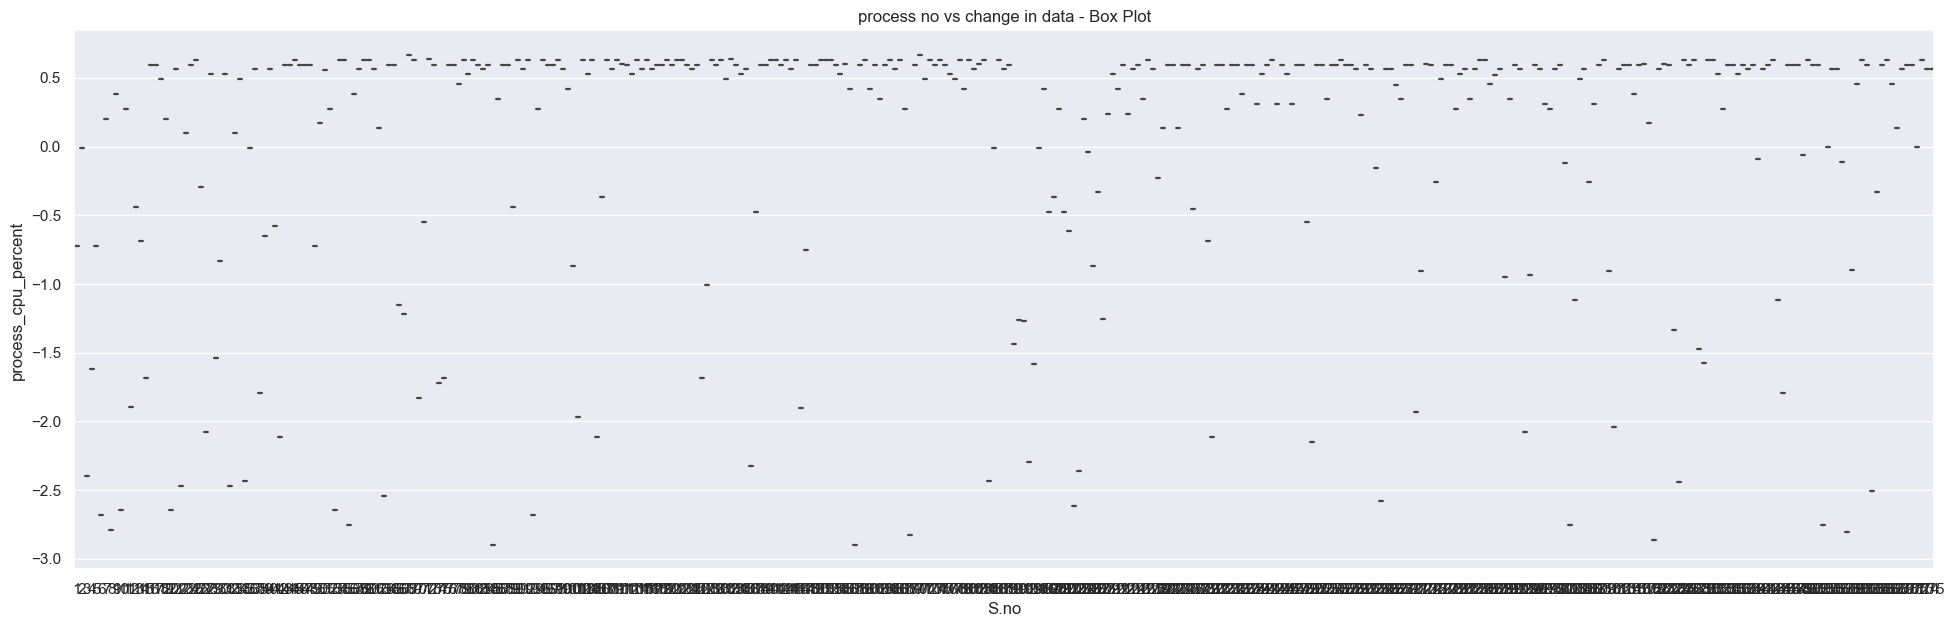

In [643]:
sns.set(rc={'figure.figsize':(24,7)})
sns.boxplot(x=dataframe['S.no'],y=dataframe_scaled['process_cpu_percent']).set_title('process no vs change in data - Box Plot')

Text(0.5, 1.0, 'process no vs change in data - Box Plot')

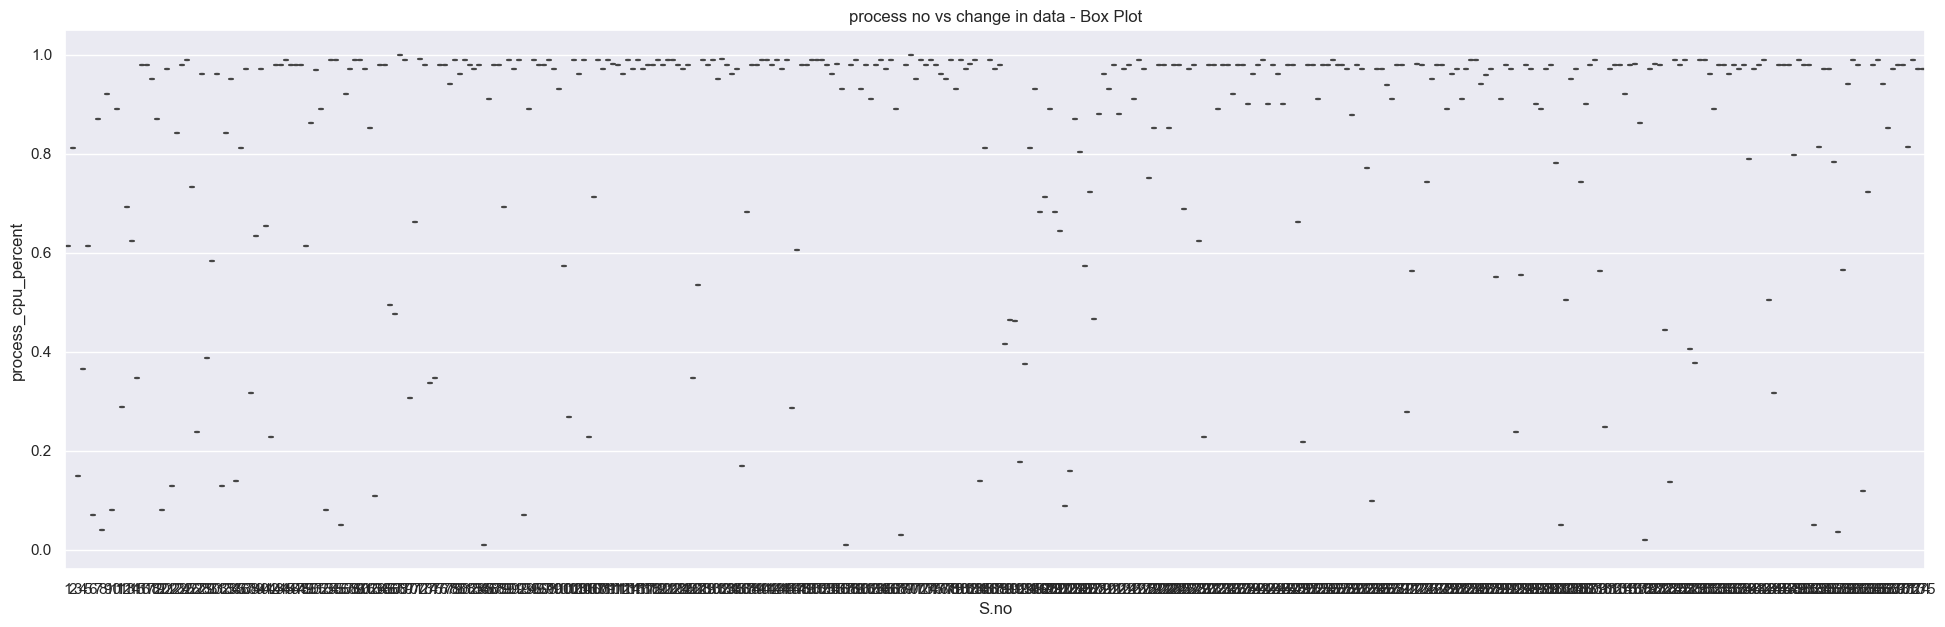

In [644]:
sns.set(rc={'figure.figsize':(24,7)})
sns.boxplot(x=dataframe['S.no'],y=df_max_scaled['process_cpu_percent']).set_title('process no vs change in data - Box Plot')

Text(0.5, 1.0, 'process no vs change in data - Box Plot')

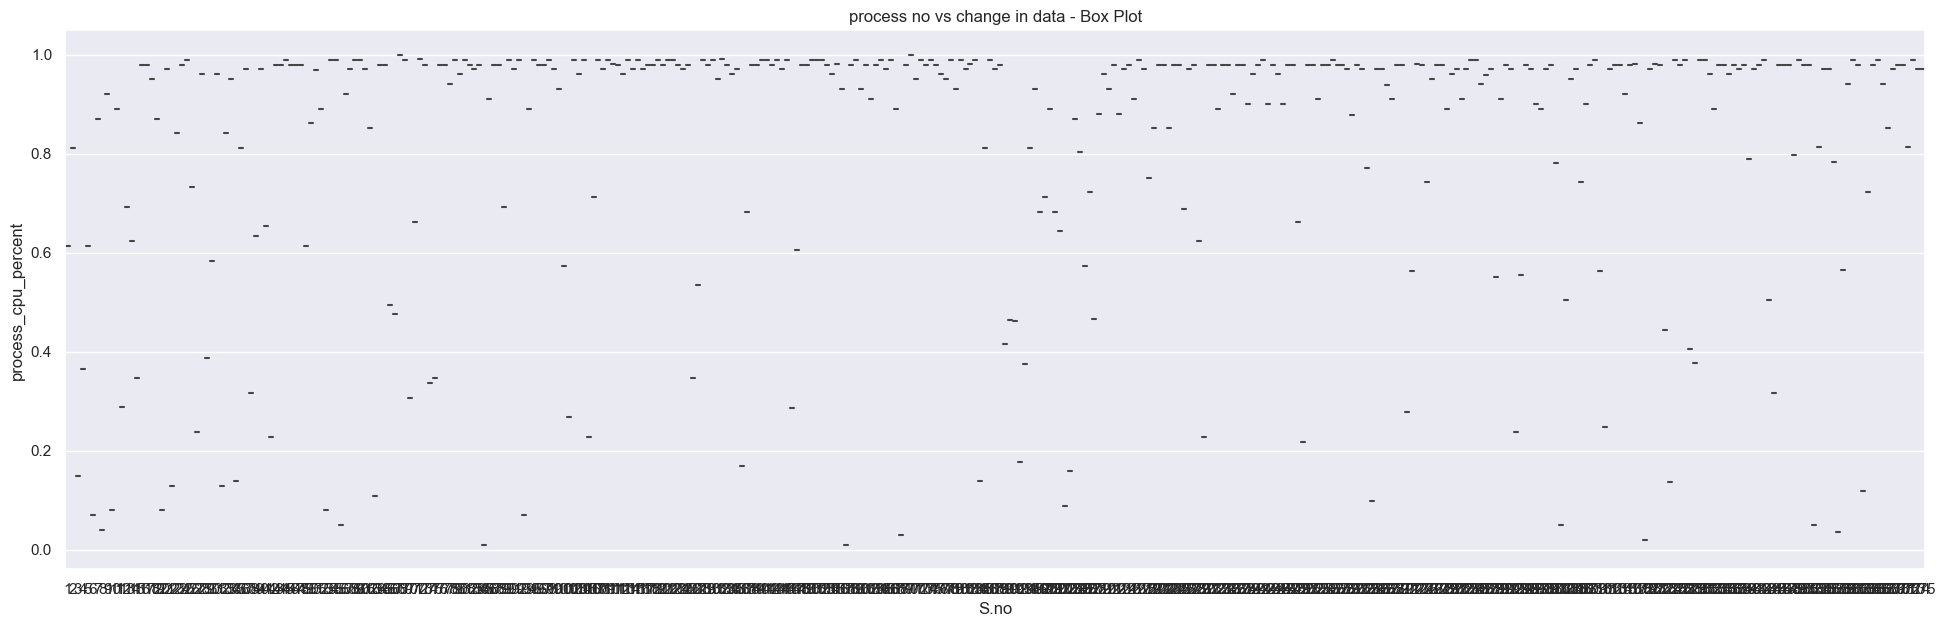

In [645]:
sns.violinplot(x=dataframe['S.no'],y=df_max_scaled['process_cpu_percent']).set_title('process no vs change in data - Box Plot')

# **DATA CORELATION**

The data points are said to be positively co related if they are directly proportional to each other.
The data points are said to be negitively co related if they are in
directly proportional to each other.

In [646]:
relation=dataframe_scaled.corr()

<AxesSubplot:>

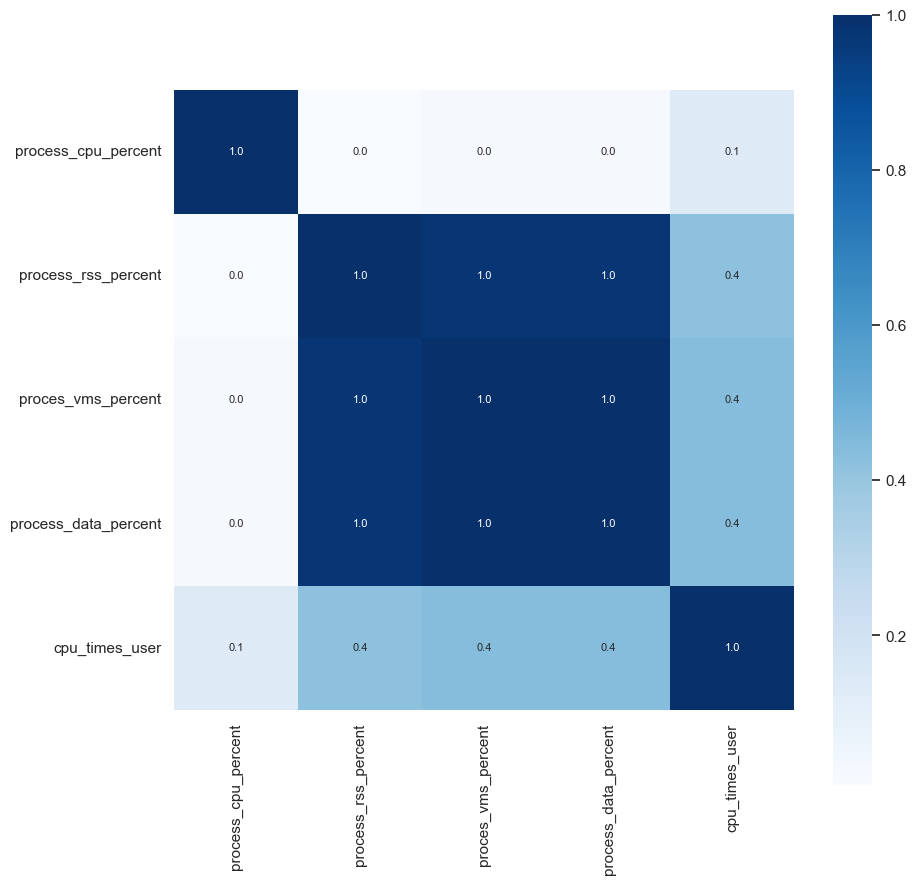

In [647]:
plt.figure(figsize=(10,10))
sns.heatmap(relation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

# **Adjusting the axis**

In [648]:
X = dataframe['S.no']
Y = df_max_scaled['process_cpu_percent']

In [649]:
X

0        1
1        2
2        3
3        4
4        5
      ... 
370    371
371    372
372    373
373    374
374    375
Name: S.no, Length: 375, dtype: int64

In [650]:
Y

0      0.613479
1      0.811695
2      0.148662
3      0.365709
4      0.613479
         ...   
370    0.980178
371    0.812686
372    0.990089
373    0.970268
374    0.970268
Name: process_cpu_percent, Length: 375, dtype: float64

# **TEST TRAIN SPLIT**using sklearn

> Indented block



In [680]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=2)

In [654]:
print(X.shape, X_train.shape, X_test.shape)

(375,) (300,) (75,)


# **Training Regression model**

In [682]:
def fit(model):
   model.fit(X_train.values.reshape(-1,1),Y_train)

In [655]:
model1 = LGBMRegressor()

In [679]:
fit(model1)

# **Testing Regression model**

In [658]:
Y_pred1 = model1.predict(X_test.values.reshape(-1,1))

In [684]:
# Model making a prediction on test data
prediction = model.predict(X_test.values.reshape(-1,1))

# **Evaluation**